# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib.ticker import MaxNLocator
mpl.rcParams['figure.figsize'] = [16.0,8.0]

In [2]:
# Load the renewable energy data
renewable_energy_df = pd.read_csv('assets/global-renewable-energy.csv')

# Load the CO2 emissions data
co2_emissions_df = pd.read_csv('assets/global-fossil-co2-emissions-by-country.csv')


In [3]:
# Display the first few rows to verify the data
renewable_energy_df.head()

,Entity,Code,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
0,Africa,NaN,1965,94.463,5.537,0.0
1,Africa,NaN,1966,94.127,5.873,0.0
2,Africa,NaN,1967,93.920,6.080,0.0
3,Africa,NaN,1968,93.257,6.743,0.0
4,Africa,NaN,1969,92.317,7.683,0.0


In [4]:
# Display the first few rows to verify the data
co2_emissions_df.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Cleaning the Data

In [5]:
# Rename the 'Entity' column to 'Country'
renewable_energy_df.rename(columns={'Entity': 'Country'}, inplace=True)

# Change 'USA' to 'United States of America' in the 'Country' column
co2_emissions_df['Country'].replace('USA', 'United States of America', inplace=True)
renewable_energy_df['Country'].replace('United States', 'United States of America', inplace=True)

# Change 'Russia' to 'Russian Federation' in the 'Country' column
co2_emissions_df['Country'].replace('Russia', 'Russian Federation', inplace=True)
renewable_energy_df['Country'].replace('Russia', 'Russian Federation', inplace=True)

# Find common countries in both datasets
common_countries = set(renewable_energy_df['Country']).intersection(set(co2_emissions_df['Country']))

# Filter both datasets to keep only common countries
renewable_energy_df_cleaned = renewable_energy_df[renewable_energy_df['Country'].isin(common_countries)]
co2_emissions_df_cleaned = co2_emissions_df[co2_emissions_df['Country'].isin(common_countries)]

# Filter both datasets to include data between the years 2000 and 2021
renewable_energy_df_cleaned = renewable_energy_df_cleaned[
    (renewable_energy_df_cleaned['Year'] >= 1990) & (renewable_energy_df_cleaned['Year'] <= 2019)
]

co2_emissions_df_cleaned = co2_emissions_df_cleaned[
    (co2_emissions_df_cleaned['Year'] >= 1990) & (co2_emissions_df_cleaned['Year'] <= 2019)
]

# Drop the column 'ISO 3166-1 alpha-3' from the CO2 emissions dataset and "Code" from Renewable Energy datasets
co2_emissions_df_cleaned = co2_emissions_df_cleaned.drop(columns=['ISO 3166-1 alpha-3'])
renewable_energy_df_cleaned = renewable_energy_df_cleaned.drop(columns=['Code'])


# Step 5: Sort both datasets alphabetically by country and year
renewable_energy_df_cleaned = renewable_energy_df_cleaned.sort_values(by=['Country', 'Year'])
co2_emissions_df_cleaned = co2_emissions_df_cleaned.sort_values(by=['Country', 'Year'])

# Reset index (for clean output)
renewable_energy_df_cleaned.reset_index(drop=True, inplace=True)
co2_emissions_df_cleaned.reset_index(drop=True, inplace=True)


In [6]:
# Verify the cleaned data
co2_emissions_df_cleaned.head()

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Algeria,1990,76.737628,2.942192,23.204112,38.908016,2.988636,8.694672,NaN,3.007187
1,Algeria,1991,78.806834,2.689376,26.065696,38.428032,2.969362,8.654368,NaN,3.015502
2,Algeria,1992,79.883305,2.377936,28.678128,31.931760,2.997929,13.897552,NaN,2.986481
3,Algeria,1993,81.943970,1.923600,27.992960,36.097728,2.988434,12.941248,NaN,2.995649
4,Algeria,1994,86.147476,2.286238,30.450203,37.385859,2.820683,13.204492,NaN,3.083633


In [7]:
# Verify the cleaned data
renewable_energy_df_cleaned.head()

,Country,Year,Fossil fuels (% sub energy),Renewables (% sub energy),Nuclear (% sub energy)
0,Algeria,1990,99.881,0.119,0.0
1,Algeria,1991,99.739,0.261,0.0
2,Algeria,1992,99.827,0.173,0.0
3,Algeria,1993,99.671,0.329,0.0
4,Algeria,1994,99.847,0.153,0.0


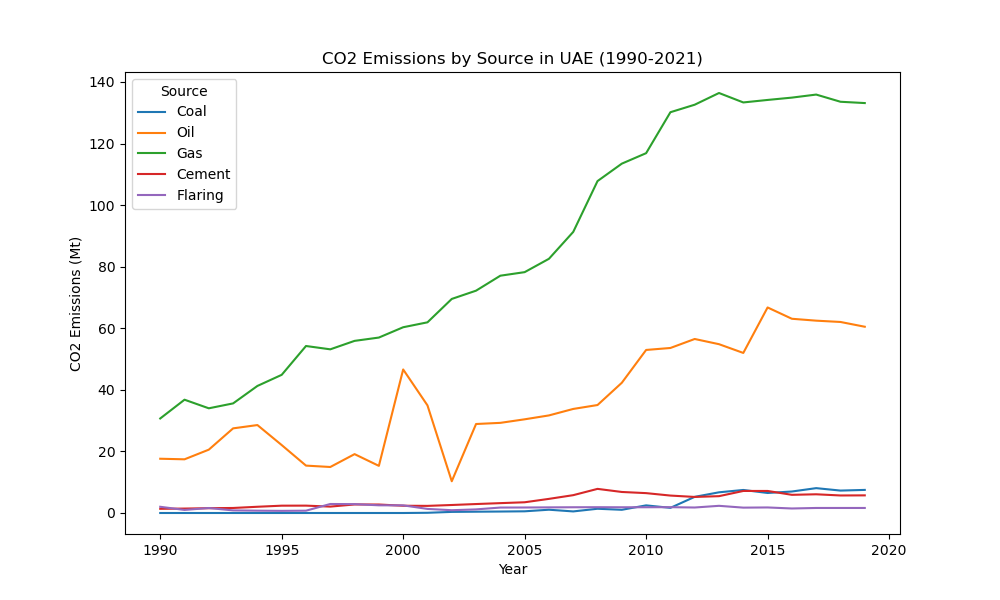

In [8]:
# Filter the CO2 emissions data for the United Arab Emirates (Example)
uae_co2_emissions = co2_emissions_df_cleaned[co2_emissions_df_cleaned['Country'] == 'United Arab Emirates']

# Melt the dataframe to have a long-form dataframe for seaborn plotting
uae_co2_melted = uae_co2_emissions.melt(id_vars='Year', 
                                        value_vars=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring'], 
                                        var_name='Source', 
                                        value_name='CO2 Emissions')

# Create the plot
plt.figure(figsize=(10,6))
sns.lineplot(data=uae_co2_melted, x='Year', y='CO2 Emissions', hue='Source')

plt.title('CO2 Emissions by Source in UAE (1990-2021)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Mt)')
plt.legend(title='Source')

plt.show()

In [9]:
# Widget

# Define the dropdown for country selection
country_dropdown = widgets.Dropdown(
    options=sorted(list(set(co2_emissions_df_cleaned['Country']))),  # Extract unique country names
    description='Country',
    value='United Arab Emirates'  # default value
)

@interact(country=country_dropdown)
def plot_co2_emissions_by_source(country):
    # Filter the CO2 emissions data for the selected country
    country_data = co2_emissions_df_cleaned[co2_emissions_df_cleaned['Country'] == country]
    
    # Melt the DataFrame to have a long-form DataFrame for seaborn plotting
    country_data_melted = country_data.melt(
        id_vars='Year', 
        value_vars=['Coal', 'Oil', 'Gas', 'Cement', 'Flaring'], 
        var_name='Source', 
        value_name='CO2 Emissions'
    )
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=country_data_melted, x='Year', y='CO2 Emissions', hue='Source')
    
    plt.title(f'CO2 Emissions by Source in {country} (1990-2021)')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (Mt)')
    plt.legend(title='Source')
    plt.show()

interactive(children=(Dropdown(description='Country', index=72, options=('Algeria', 'Argentina', 'Australia', …

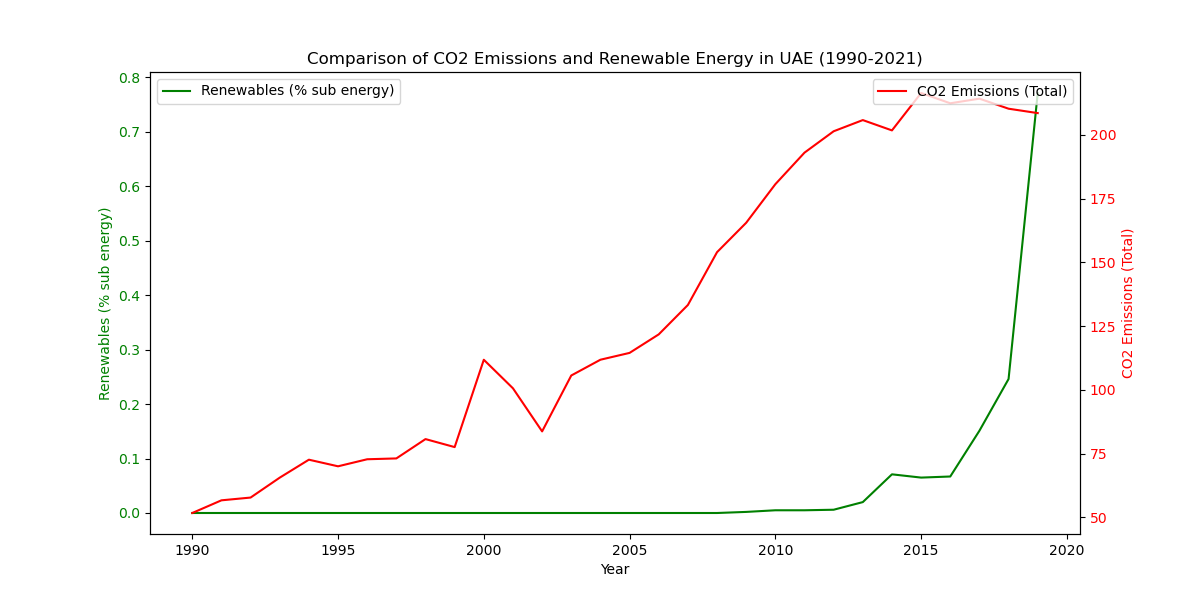

In [10]:
# Filter the renewable energy and CO2 emissions data for the UAE
uae_renewable_energy = renewable_energy_df_cleaned[renewable_energy_df_cleaned['Country'] == 'United Arab Emirates']
uae_co2_emissions = co2_emissions_df_cleaned[co2_emissions_df_cleaned['Country'] == 'United Arab Emirates']

# Merge the datasets on 'Year'
uae_combined = pd.merge(uae_renewable_energy, uae_co2_emissions, on=['Country', 'Year'])

# Create the plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the percentage of renewable energy
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewables (% sub energy)', color='green')
sns.lineplot(data=uae_combined, x='Year', y='Renewables (% sub energy)', ax=ax1, label='Renewables (% sub energy)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create a second y-axis for CO2 emissions
ax2 = ax1.twinx()
ax2.set_ylabel('CO2 Emissions (Total)', color='red')
sns.lineplot(data=uae_combined, x='Year', y='Total', ax=ax2, label='CO2 Emissions (Total)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and labels
plt.title('Comparison of CO2 Emissions and Renewable Energy in UAE (1990-2021)')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


In [11]:
# Widget

# Define the dropdown and slider for interaction
country_dropdown = widgets.Dropdown(
    options=sorted(list(set(renewable_energy_df_cleaned['Country']) & set(co2_emissions_df_cleaned['Country']))),
    description='Country',
    value='United Arab Emirates'  # default value
)

year_slider = widgets.IntRangeSlider(
    value=[1990, 2019],
    min=1990,
    max=2019,
    step=1,
    description='Year Range',
    continuous_update=False
)

@interact(country=country_dropdown, year_range=year_slider)
def plot_data(country, year_range):
    # Filter the data based on the selected country and year range
    start_year, end_year = year_range
    co2_filtered = co2_emissions_df_cleaned[(co2_emissions_df_cleaned['Country'] == country) & 
                                            (co2_emissions_df_cleaned['Year'] >= start_year) & 
                                            (co2_emissions_df_cleaned['Year'] <= end_year)]
    
    renewable_filtered = renewable_energy_df_cleaned[(renewable_energy_df_cleaned['Country'] == country) & 
                                                     (renewable_energy_df_cleaned['Year'] >= start_year) & 
                                                     (renewable_energy_df_cleaned['Year'] <= end_year)]
    
    # Merge the two datasets on 'Year' for comparison
    merged_df = pd.merge(renewable_filtered, co2_filtered, on=['Country', 'Year'])
    
    # Plotting
    fig, ax1 = plt.subplots(figsize=(12, 6))

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Renewables (% sub energy)', color='green')
    sns.lineplot(data=merged_df, x='Year', y='Renewables (% sub energy)', ax=ax1, label='Renewables (% sub energy)', color='green')
    ax1.tick_params(axis='y', labelcolor='green')

    # Create a second y-axis for CO2 emissions
    ax2 = ax1.twinx()
    ax2.set_ylabel('Total CO2 Emissions [Mt]', color='red')
    sns.lineplot(data=merged_df, x='Year', y='Total', ax=ax2, label='Total CO2 Emissions [Mt]', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

    # Add titles and labels
    plt.title(f'CO2 Emissions and Renewable Energy for {country} ({start_year}-{end_year})')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    # Adjust legend outside tyhe box
    ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 0.95), borderaxespad=0.)

    # Display the plot
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

interactive(children=(Dropdown(description='Country', index=72, options=('Algeria', 'Argentina', 'Australia', …

In [13]:
import json
# Load GeoJSON file for country boundaries
with open('world_countries.json') as f:
    geo_data = json.load(f)
    

# Function to generate the choropleth map based on user's selection
def generate_choropleth(data_type, year):
    folium_map = folium.Map(location=[20, 0], zoom_start=2)
    
    
    if data_type == 'CO2 emissions':
        data = co2_emissions_df_cleaned[co2_emissions_df_cleaned['Year'] == year]
        # Create a color scale based on CO2 emissions
        folium.Choropleth(
            geo_data=geo_data,
            name='choropleth',
            data=data,
            columns=['Country', 'Total'],
            key_on='feature.properties.name',  # Match country names in GeoJSON
            fill_color='YlOrRd',  
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='CO2 Emissions (Total)',
            bins=100,
            reset=True  
        ).add_to(folium_map)
        
    elif data_type == 'Renewable Energy %':
        data = renewable_energy_df_cleaned[renewable_energy_df_cleaned['Year'] == year]
        # Create a color scale based on Renewable Energy Percentage
        folium.Choropleth(
            geo_data=geo_data,
            name='choropleth',
            data=data,
            columns=['Country', 'Renewables (% sub energy)'],
            key_on='feature.properties.name',  
            fill_color='BuGn',  
            fill_opacity=0.7,
            line_opacity=0.2,
            legend_name='Renewable Energy %',
            bins=100,  
            reset=True  
        ).add_to(folium_map)

    folium.LayerControl().add_to(folium_map)
    return folium_map

# Dropdown for year and data type
year_dropdown = widgets.Dropdown(
    options=list(range(1990, 2020)),
    value=2000,
    description="Year"
)

data_type_dropdown = widgets.Dropdown(
    options=['CO2 emissions', 'Renewable Energy %'],
    value='CO2 emissions', description='Data Type'
)

# Interactive function to display the map
@interact(data_type=data_type_dropdown, year=year_dropdown)
def update_map(data_type, year):
    display(generate_choropleth(data_type, year))

interactive(children=(Dropdown(description='Data Type', options=('CO2 emissions', 'Renewable Energy %'), value…